<a href="https://colab.research.google.com/github/EfrainHernandezCortes/Investigaci-n-de-Operaciones-7MM1/blob/main/Inventario_con_l%C3%ADmite_de_almac%C3%A9n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inventario de varios artículos con limitación de almacén.

Para el desarrollo de los 3 pasos del modelo "Cantidad económica de pedido de varios artículos con limitación de almacén"se tomará como ejemplo el 11.2-3 del libro Investigación de Operaciones de Taha, séptima edición.

**11.2-3.** Seleccione tres de las aplicaciones reales de PEB de compañías u ofi cinas de gobierno que se mencionó en la sección 11.2.
Lea los artículos que las describen en las referencias de Interfaces.
Escriba un resumen de una página de la aplicación y sus benefi cios
de cada uno.

Se considera el caso $n>1$ artículos en donde su inventario individual no permite faltantes. En esta caso, los artículos compiten por su espacio en el almacén, que está limitado.

Para $i = 1, 2, ..., n$:

$D_i = $ Tasa de demanda

$K_i = $ Costo de preparación

$h_i = $ Costo unitario de almacenamiento por unidad de tiempo

$y_i = $ Cantidad del pedido

$a_i = $ Área de almacenamiento necesaria por unidad de inventario

$A = $ Área máxima disponible de almacenamiento para los $n$ artículos

Modelo:

**$Minimizar TCU(y_i, y_2, ..., y_n) = \sum_{i=1}^n(\frac{K_iD_i}{y_i} + \frac{h_iy_i}{2})$**

sujeta a:

$\sum_{i=1}^na_iy_i≤A$

$y_i > 0, i = 1, 2, ..., n$.

Paso 1. Calcular

$y_i* =  \sqrt{\frac{2K_iD_i}{h_i}}$

$i = 1, 2, ..., n$

Paso 2. Comprobar si $y_i$ satisfacen la restricción de almacenamiento. Si es así, $y_i*$ es óptima (detenerse); si no es así, se continúa con el Paso 3.

Se debe satisfacer la restricción del almacenamiento en forma de ecuación. Para esto se requiere del método de multiplicadores de Lagrange para determinar los valores restringidos óptimos.

Función de Lagrange:

$$L(\lambda, y_1, y_2, \ldots, y_n) = TCU(y_1, y_2, \ldots, y_n) - \lambda \left( \sum_{i=1}^n a_i y_i - A \right)$$
$$= \sum_{i=1}^n \left( \frac{K_i D_i}{y_i} + \frac{h_i y_i}{2} \right) - \lambda \left( \sum_{i=1}^n a_i y_i - A \right)$$

donde $λ<0$ es el multiplicador de Lagrange.

Los valores $y_i*$ y $λ$ se determinan con la condición:

$\frac{∂L}{∂λ} = -\frac{K_iD_i}{y_i^2} + \frac{h_i}{2} - λa_i = 0$

$\frac{∂L}{∂λ} = -∑_{i=1}^na_iy_i + A = 0$

Ejercicio

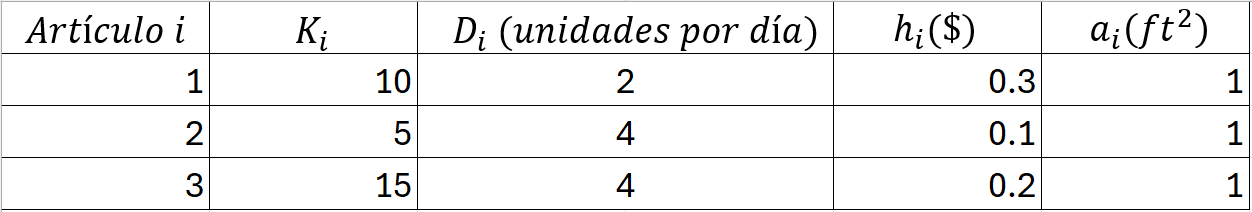

$Área Total disponible para almacenamiento = 25^2$

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

Se definen las variables del problema:

In [2]:
K = np.array([10, 5, 15], dtype=float)
D = np.array([2, 4, 4], dtype=float)
h = np.array([0.30, 0.10, 0.20], dtype=float)
a = np.array([1, 1, 1], dtype=float)
A = 25.0

Paso 1:

In [4]:
y_0 = np.sqrt(2 * K * D / h)
print("Paso 1: EOQ no restringido")
for i, y in enumerate(y_0): # Para iterar sobre iterable
    print(f"Artículo {i+1}: y* = {y:.3f}")

Paso 1: EOQ no restringido
Artículo 1: y* = 11.547
Artículo 2: y* = 20.000
Artículo 3: y* = 24.495


Paso 2:

In [7]:
uso_almacen = np.sum(a * y_0)
print(f"Uso total de almacén = {uso_almacen:.3f}")
if uso_almacen <= A: # Para verificar si se detiene o se continua a Paso 3
    print("Es la solución óptima.")
    y_opt = y_0
else:
    print("Se continúa al paso 3 ya que no se satisface la restricción.")

Uso total de almacén = 56.042
Se continúa al paso 3 ya que no se satisface la restricción.


Paso 3:

In [12]:
def ecuacion_lambda(lam):
    y = np.sqrt(2*K*D / (h - 2*lam*a))
    return np.sum(a*y) - A

sol = root(ecuacion_lambda, x0=-0.01) #Encuentra las raíces de un sistema de ecuaciones no lineales
lam_opt = sol.x[0]
y_opt = np.sqrt(2*K*D / (h - 2*lam_opt*a))
#Solución
print(f"Lambda óptimo = {lam_opt:.6f}")
print("Cantidades óptimas de pedido para los artículos:")
for i, y in enumerate(y_opt):
    print(f"Artículo {i+1}: y = {y:.3f}")
print(f"Uso de almacén = {np.sum(a*y_opt):.3f}")

Lambda óptimo = -0.347958
Cantidades óptimas de pedido para los artículos:
Artículo 1: y = 6.338
Artículo 2: y = 7.089
Artículo 3: y = 11.573
Uso de almacén = 25.000
